<h2><b>Optimización de Portafolios de Markowitz</b></h2>
<h4>Juan David Rincón, Mayo 2023</h4>

In [41]:
# Librerias
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import scipy

In [58]:
# Parámetros iniciales.
stocks = ["INTC", "JNJ", "JPM", "KO", "PFE", "PG", "PYPL", "TSLA", "XOM"]
start_date = "2016-01-01"
end_date = "2022-12-31"
risk_free_ticker = "^IRX"
num_assets = len(stocks)
numberSim = 25000

In [59]:
# Extraer datos activos.
prices_df = yf.download(stocks, start=start_date, end=end_date, interval="1Mo")['Adj Close']
print(prices_df)

[*********************100%***********************]  9 of 9 completed
                 INTC         JNJ         JPM         KO        PFE  \
Date                                                                  
2016-01-01  25.015242   85.472916   48.145779  34.042824  21.916973   
2016-02-01  23.862059   86.103058   45.862038  34.209389  21.327539   
2016-03-01  26.317400   89.191788   48.240673  36.795120  21.520182   
2016-04-01  24.633411   92.390182   51.482788  35.811089  23.749151   
2016-05-01  25.699127   92.893028   53.562653  35.651234  25.193996   
...               ...         ...         ...        ...        ...   
2022-08-01  30.678877  156.914368  111.023643  60.368855  43.961971   
2022-09-01  25.018047  159.946487  102.013283  54.802513  42.533184   
2022-10-01  27.600430  170.334763  122.884514  58.976143  45.244965   
2022-11-01  29.192575  174.280563  136.098679  62.681248  48.724606   
2022-12-01  26.005337  174.075134  132.080154  63.125793  50.230343   

       

In [60]:
# Extraer tasa libre de riesgo.
risk_free = yf.Ticker(risk_free_ticker).info["regularMarketPreviousClose"]
risk_free /= 100
print(risk_free)

0.050950002999999994


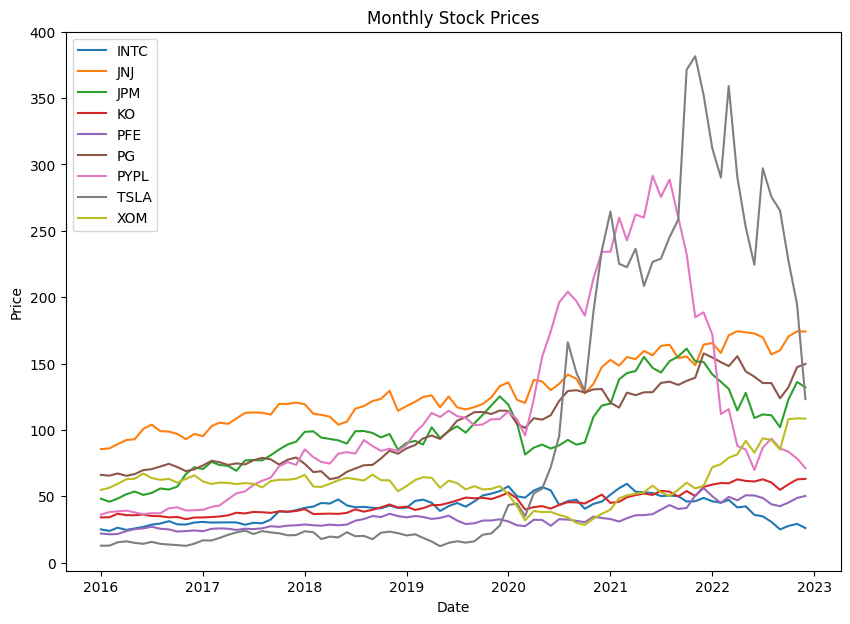

In [61]:
# Gráfica precios.
plt.figure(figsize=(10,7))

for i in range(num_assets):
  plt.plot(prices_df.iloc[:,i], label = f"{stocks[i]}")

plt.title('Monthly Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')

plt.legend()
plt.show()

In [62]:
# Retornos mensuales.
returns_df = prices_df.pct_change().dropna()
print(returns_df.head())

# Retornos promedio.
mean_returns = np.array(returns_df.mean())
print(mean_returns)

                INTC       JNJ       JPM        KO       PFE        PG  \
Date                                                                     
2016-02-01 -0.046099  0.007372 -0.047434  0.004893 -0.026894 -0.008571   
2016-03-01  0.102897  0.035872  0.051865  0.075585  0.009033  0.025159   
2016-04-01 -0.063988  0.035860  0.067207 -0.026744  0.103576 -0.026607   
2016-05-01  0.043263  0.005443  0.040399 -0.004464  0.060838  0.019769   
2016-06-01  0.047272  0.084089 -0.047954  0.016368  0.023784  0.044793   

                PYPL      TSLA       XOM  
Date                                      
2016-02-01  0.055340  0.003818  0.029544  
2016-03-01  0.012061  0.197155  0.052385  
2016-04-01  0.015026  0.047830  0.057543  
2016-05-01 -0.035477 -0.072811  0.007014  
2016-06-01 -0.033871 -0.049053  0.061872  
[0.00339498 0.00970737 0.01493629 0.00871599 0.01219208 0.010925
 0.01323015 0.04331498 0.01201319]


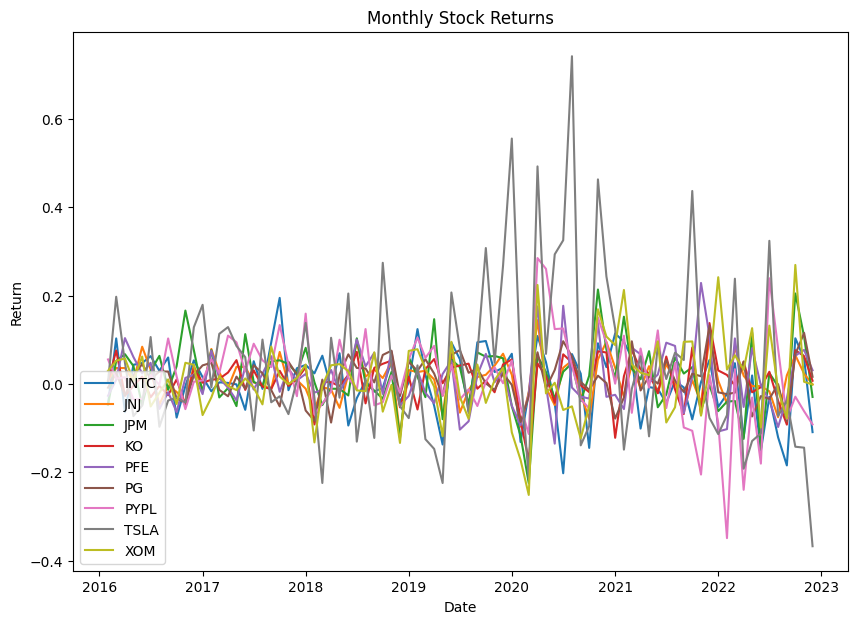

In [63]:
# Gráfica retornos.
plt.figure(figsize=(10,7))

for i in range(num_assets):
  plt.plot(returns_df.iloc[:,i], label = f"{stocks[i]}")

plt.title('Monthly Stock Returns')
plt.xlabel('Date')
plt.ylabel('Return')

plt.legend(loc="lower left")
plt.show()

In [64]:
# Inversión individual en los activos.
stocks_return = (1+mean_returns)**(12)-1
stocks_risk = np.std(returns_df)*np.sqrt(12)

indv_all = pd.DataFrame({"Annualized Return" : np.round(stocks_return*100, 2),
                         "Annualized Risk" : np.round(stocks_risk*100, 2)})


print("-"*80)
print("Individual Allocation")
print("\n")
print(indv_all.T)
print("-"*80)

--------------------------------------------------------------------------------
Individual Allocation


                    INTC    JNJ    JPM     KO    PFE     PG   PYPL   TSLA  \
Annualized Return   4.15  12.29  19.47  10.98  15.65  13.93  17.08  66.34   
Annualized Risk    26.14  16.29  25.49  17.12  23.04  15.78  34.14  65.14   

                     XOM  
Annualized Return  15.41  
Annualized Risk    30.18  
--------------------------------------------------------------------------------


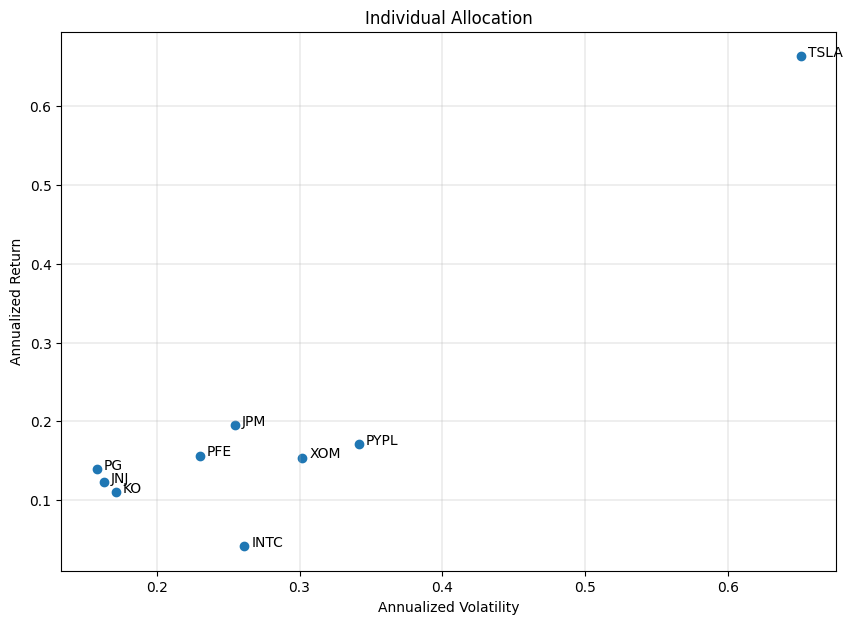

In [65]:
# Gráfica activos individuales.
plt.figure(figsize=(10,7))
plt.scatter(stocks_risk, stocks_return)

for i, name in enumerate(stocks):
    plt.annotate(name, (stocks_risk[i], stocks_return[i]), xytext=(5,0), textcoords='offset points')

plt.title('Individual Allocation')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')

plt.grid(True, linewidth=0.3)
plt.show()

In [66]:
# Simular portafolios.
weights = pd.DataFrame(np.nan, index=range(numberSim), columns=stocks)

for i in range(numberSim):
  random_numbers = np.array([random.random() for _ in range(returns_df.shape[1])])
  sum_rand_numbers = sum(random_numbers)

  weights.iloc[i,:] = random_numbers/sum_rand_numbers

print(weights)

           INTC       JNJ       JPM        KO       PFE        PG      PYPL  \
0      0.039373  0.050213  0.118197  0.149700  0.156229  0.129522  0.206190   
1      0.174498  0.185696  0.063686  0.184109  0.114987  0.099173  0.000991   
2      0.069208  0.150066  0.039345  0.283094  0.011593  0.079311  0.034918   
3      0.047856  0.052266  0.177591  0.014745  0.031908  0.363587  0.052349   
4      0.133229  0.046338  0.068073  0.204791  0.077070  0.016558  0.190849   
...         ...       ...       ...       ...       ...       ...       ...   
24995  0.113165  0.169729  0.138837  0.077072  0.017696  0.098575  0.221139   
24996  0.151305  0.139892  0.122000  0.150210  0.140052  0.070249  0.110579   
24997  0.165013  0.180044  0.042827  0.070087  0.147631  0.053060  0.198167   
24998  0.161975  0.013598  0.188941  0.035958  0.061808  0.203276  0.179522   
24999  0.068523  0.211313  0.163296  0.023267  0.004772  0.174352  0.171264   

           TSLA       XOM  
0      0.031881  0.1186

In [67]:
# Matriz de Varianza Covarianza.
cov_matrix = np.cov(returns_df, rowvar=False)

# Desviaciones estándar por activo.
stdev_assets = np.sqrt(np.diagonal(cov_matrix))

In [68]:
# Función para calcular rentabilidad de los portafolios (Anual).
def rent_Portfolios_f(weights, mean_returns):
  rtrn1 = np.dot(mean_returns, weights)
  rtrn1 = (1 + rtrn1)**(12)-1
  return rtrn1

# Función para calcular riesgo de los portafolios (Anual).
def risk_Portfolios_f(weights, varcov):
  risk1 = np.dot(weights.T, np.dot(varcov, weights))
  risk1 = np.sqrt(risk1*12)
  return risk1

# Función para calcular Sharpe Ratio.
def sharpe_ratio_f(rent, risk_free, risk):
  sr1 = (rent - risk_free)/risk
  return sr1

In [69]:
# Retornos y riesgo portafolios (Anual).
results_portfolios = pd.DataFrame(np.nan, index=range(numberSim), columns=["Rtrn", "Std Dev", "Sharpe Ratio"])

for i in range(numberSim):
  results_portfolios.iloc[i,0] = rent_Portfolios_f(weights=weights.iloc[i,:], mean_returns=mean_returns)
  results_portfolios.iloc[i,1] = risk_Portfolios_f(weights=weights.iloc[i,:], varcov=cov_matrix)
  results_portfolios.iloc[i,2] = sharpe_ratio_f(rent=results_portfolios.iloc[i,0], risk_free=risk_free, risk=results_portfolios.iloc[i,1])

print(results_portfolios)

           Rtrn   Std Dev  Sharpe Ratio
0      0.161385  0.157887      0.699460
1      0.130298  0.146173      0.542838
2      0.210805  0.194593      0.821483
3      0.169777  0.153665      0.773285
4      0.180859  0.186104      0.698044
...         ...       ...           ...
24995  0.152903  0.168304      0.605764
24996  0.172898  0.164969      0.739214
24997  0.148525  0.163483      0.596853
24998  0.194004  0.184828      0.773984
24999  0.225497  0.203064      0.859563

[25000 rows x 3 columns]


In [70]:
# Portafolio de Mínima Varianza.
min_var_index = np.argmin(results_portfolios["Std Dev"])
min_var_rent = results_portfolios.iloc[min_var_index, 0]
min_var_risk = results_portfolios.iloc[min_var_index, 1]
min_var_sr = results_portfolios.iloc[min_var_index, 2]

# Portafolio de Máxima Eficiencia.
max_sr_index = np.argmax(results_portfolios["Sharpe Ratio"])
max_sr_rent = results_portfolios.iloc[max_sr_index, 0]
max_sr_risk = results_portfolios.iloc[max_sr_index, 1]
max_sr_sr = results_portfolios.iloc[max_sr_index, 2]

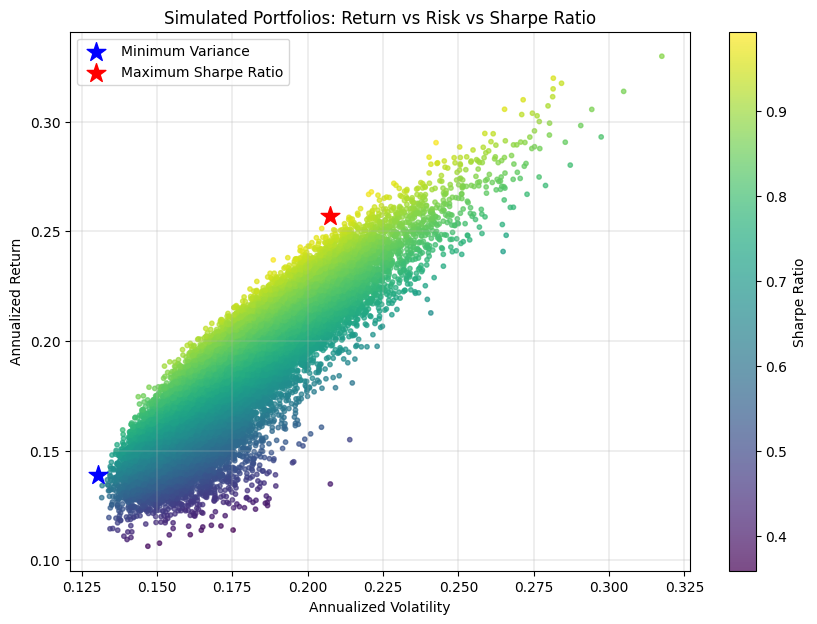

In [71]:
# Gráfica portafolios.
plt.figure(figsize=(10,7))
plt.scatter(results_portfolios["Std Dev"], results_portfolios["Rtrn"], c=results_portfolios["Sharpe Ratio"], alpha=0.7, s=10)
plt.colorbar().set_label("Sharpe Ratio")

plt.scatter(min_var_risk, min_var_rent, marker='*', s=200, color="blue", label="Minimum Variance")
plt.scatter(max_sr_risk, max_sr_rent, marker='*', s=200, color="red", label="Maximum Sharpe Ratio")

plt.title('Simulated Portfolios: Return vs Risk vs Sharpe Ratio')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')

plt.grid(True, linewidth=0.3)
plt.legend()
plt.show()

In [72]:
print("-"*80)

# Ponderaciones Portafolio de Mínima Varianza.
pond_min_vr = pd.DataFrame(weights.iloc[min_var_index], index=stocks)
pond_min_vr.columns = ["Allocation"]
pond_min_vr.Allocation = [round(i*100, 2) for i in pond_min_vr.Allocation]
print("Minimum Variance Portfolio")
print("\n")
print(f"Annualized Return: {round(min_var_rent*100, 2)}")
print(f"Annualized Risk: {round(min_var_risk*100, 2)}")
print(f"Sharpe Ratio: {round(min_var_sr, 2)}")
print("\n")
print(pond_min_vr.T)

print("-"*80)

# Ponderaciones Portafolio de Máxima Eficiencia.
pond_max_sr = pd.DataFrame(weights.iloc[max_sr_index], index=stocks)
pond_max_sr.columns = ["Allocation"]
pond_max_sr.Allocation = [round(i*100, 2) for i in pond_max_sr.Allocation]
print("Maximum Efficiency Portfolio")
print("\n")
print(f"Annualized Return: {round(max_sr_rent*100, 2)}")
print(f"Annualized Risk: {round(max_sr_risk*100, 2)}")
print(f"Sharpe Ratio: {round(max_sr_sr, 2)}")
print("\n")
print(pond_max_sr.T)
print("-"*80)

--------------------------------------------------------------------------------
Minimum Variance Portfolio


Annualized Return: 13.9
Annualized Risk: 13.05
Sharpe Ratio: 0.67


            INTC    JNJ   JPM     KO    PFE     PG  PYPL  TSLA   XOM
Allocation  3.67  18.98  8.56  17.63  12.75  27.39  7.01  0.52  3.47
--------------------------------------------------------------------------------
Maximum Efficiency Portfolio


Annualized Return: 25.69
Annualized Risk: 20.74
Sharpe Ratio: 0.99


            INTC   JNJ    JPM    KO    PFE     PG  PYPL   TSLA   XOM
Allocation  0.73  1.89  22.97  7.17  15.23  26.13  2.77  22.74  0.37
--------------------------------------------------------------------------------


In [73]:
# Minimización de Varianza.
def min_variance_f(varcov):
    number_assets = varcov.shape[0]
    initial_point = number_assets*[1/number_assets]

    args = (varcov)
    constraints = ({"type" : "eq", "fun" : lambda x: np.sum(x) - 1})
    bounds = tuple((0.0, 1.0) for asset in range(number_assets))

    result = scipy.optimize.minimize(risk_Portfolios_f, initial_point, args=args,
                                     method="SLSQP", bounds=bounds, constraints=constraints)
    
    return result.x

# Máximización de Sharpe Ratio.
def max_sharpe_ratio_f(mean_returns, varcov, risk_free):
    
    def auxiliar1(weights, mean_returns, varcov, risk_free):
        a = rent_Portfolios_f(weights=weights, mean_returns=mean_returns)
        b = risk_Portfolios_f(weights=weights, varcov=varcov)
        c = -((a - risk_free)/b)

        return c
    
    number_assets = len(mean_returns)
    initial_point = number_assets*[1/number_assets]

    args = (mean_returns, varcov, risk_free)
    constraints = ({"type" : "eq", "fun" : lambda x: np.sum(x) - 1})
    bounds = tuple((0.0, 1.0) for asset in range(number_assets))

    result = scipy.optimize.minimize(auxiliar1, initial_point, args=args,
                                     method="SLSQP", bounds=bounds, constraints=constraints)
    
    return result.x

# Calculo Frontera eficiente.
def efficient_frontier_f(mean_returns, varcov, target):
    number_assets = len(mean_returns)
    initial_point = number_assets*[1/number_assets]

    args = (varcov)
    constraints = ({"type" : "eq", "fun" : lambda x: rent_Portfolios_f(x, mean_returns) - target},
                   {"type" : "eq", "fun" : lambda x: np.sum(x) - 1})
    bounds = tuple((0.0, 1.0) for asset in range(number_assets))

    result = scipy.optimize.minimize(risk_Portfolios_f, initial_point, args=args,
                                     method="SLSQP", bounds=bounds, constraints=constraints)
    
    return result.x    


In [74]:
# Portafolio de Mínima Varianza (Optimización).
weights_min_var_clc = min_variance_f(cov_matrix)
min_var_rent_clc = rent_Portfolios_f(weights_min_var_clc, mean_returns)
min_var_risk_clc = risk_Portfolios_f(weights_min_var_clc, cov_matrix)
min_var_sr_clc = sharpe_ratio_f(min_var_rent_clc, risk_free, min_var_risk_clc)

# Portafolio de Máxima Eficiencia (Optimización).
weights_max_sr_clc = max_sharpe_ratio_f(mean_returns, cov_matrix, risk_free)
max_sr_rent_clc = rent_Portfolios_f(weights_max_sr_clc, mean_returns)
max_sr_risk_clc = risk_Portfolios_f(weights_max_sr_clc, cov_matrix)
max_sr_sr_clc = sharpe_ratio_f(max_sr_rent_clc, risk_free, max_sr_risk_clc)

# Frontera eficiente.
rent_targets = np.linspace(min_var_rent_clc, np.max(results_portfolios['Std Dev']), 100)

frontier_rent_clc = []
frontier_risk_clc = []
for i in rent_targets:
    weights_clc = efficient_frontier_f(mean_returns, cov_matrix, i)
    frontier_rent_clc.append(rent_Portfolios_f(weights_clc, mean_returns))
    frontier_risk_clc.append(risk_Portfolios_f(weights_clc, cov_matrix))

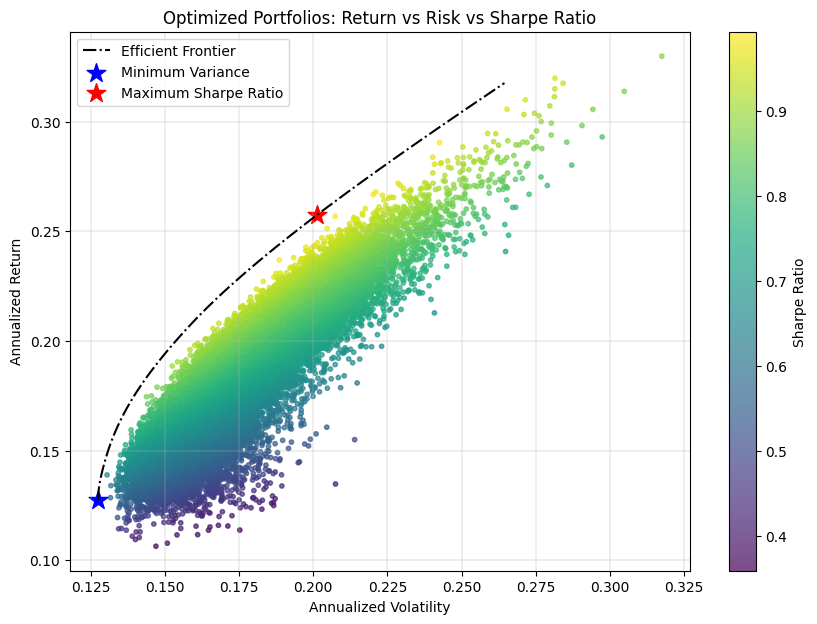

In [75]:
# Gráfica portafolios y frontera eficiente.
plt.figure(figsize=(10,7))
plt.scatter(results_portfolios["Std Dev"], results_portfolios["Rtrn"], c=results_portfolios["Sharpe Ratio"], alpha=0.7, s=10)
plt.colorbar().set_label("Sharpe Ratio")

plt.plot(frontier_risk_clc, frontier_rent_clc, linestyle = "-.", color = "black", label = "Efficient Frontier")

plt.scatter(min_var_risk_clc, min_var_rent_clc, marker='*', s=200, color="blue", label="Minimum Variance")
plt.scatter(max_sr_risk_clc, max_sr_rent_clc, marker='*', s=200, color="red", label="Maximum Sharpe Ratio")

plt.title('Optimized Portfolios: Return vs Risk vs Sharpe Ratio')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')

plt.grid(True, linewidth=0.3)
plt.legend()
plt.show()

In [76]:
print("-"*80)

# Ponderaciones Portafolio de Mínima Varianza.
pond_min_vr_clc = pd.DataFrame(weights_min_var_clc, index=stocks)
pond_min_vr_clc.columns = ["Allocation"]
pond_min_vr_clc.Allocation = [round(i*100, 2) for i in pond_min_vr_clc.Allocation]
print("Minimum Variance Portfolio")
print("\n")
print(f"Annualized Return: {round(min_var_rent_clc*100, 2)}")
print(f"Annualized Risk: {round(min_var_risk_clc*100, 2)}")
print(f"Sharpe Ratio: {round(min_var_sr_clc, 2)}")
print("\n")
print(pond_min_vr_clc.T)

print("-"*80)

# Ponderaciones Portafolio de Máxima Eficiencia.
pond_max_sr_clc = pd.DataFrame(weights_max_sr_clc, index=stocks)
pond_max_sr_clc.columns = ["Allocation"]
pond_max_sr_clc.Allocation = [round(i*100, 2) for i in pond_max_sr_clc.Allocation]
print("Maximum Efficiency Portfolio")
print("\n")
print(f"Annualized Return: {round(max_sr_rent_clc*100, 2)}")
print(f"Annualized Risk: {round(max_sr_risk_clc*100, 2)}")
print(f"Sharpe Ratio: {round(max_sr_sr_clc, 2)}")
print("\n")
print(pond_max_sr_clc.T)
print("-"*80)

--------------------------------------------------------------------------------
Minimum Variance Portfolio


Annualized Return: 12.77
Annualized Risk: 12.75
Sharpe Ratio: 0.6


            INTC    JNJ   JPM     KO   PFE     PG  PYPL  TSLA  XOM
Allocation  8.54  19.38  3.67  16.47  8.76  37.26  4.91   0.0  1.0
--------------------------------------------------------------------------------
Maximum Efficiency Portfolio


Annualized Return: 25.76
Annualized Risk: 20.14
Sharpe Ratio: 1.03


            INTC  JNJ    JPM   KO   PFE     PG  PYPL   TSLA  XOM
Allocation   0.0  0.0  25.72  0.0  9.07  42.95   0.0  22.26  0.0
--------------------------------------------------------------------------------


In [ ]:
# Juan David Rincón, Mayo 2023.